In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
from sklearn.model_selection import cross_val_predict, cross_val_score
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import os

import warnings
warnings.filterwarnings('ignore')


savePlots = False

In [26]:
df = pd.read_csv('network_backup_dataset.csv', ',')
df2 = df.replace({'Day of Week': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,
                                  'Saturday': 6, 'Sunday': 7},
                  'Work-Flow-ID': {'work_flow_0': 0, 'work_flow_1': 1, 'work_flow_2': 2, 'work_flow_3': 3,
                                   'work_flow_4': 4},
                  'File Name': {'File_0': 0, 'File_1': 1, 'File_2': 2, 'File_3': 3, 'File_4': 4, 'File_5': 5,
                                'File_6': 6, 'File_7': 7, 'File_8': 8, 'File_9': 9, 'File_10': 10, 'File_11': 11,
                                'File_12': 12, 'File_13': 13, 'File_14': 14, 'File_15': 15, 'File_16': 16,
                                'File_17': 17, 'File_18': 18, 'File_19': 19, 'File_20': 20, 'File_21': 21,
                                'File_22': 22,
                                'File_23': 23, 'File_24': 24, 'File_25': 25, 'File_26': 26, 'File_27': 27,
                                'File_28': 28, 'File_29': 29, }})

X = df2[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']].as_matrix()
y = df2['Size of Backup (GB)'].as_matrix()


In [27]:
numberOfTrees = 20
treeDepth = 4
bootstrap = True
maxFeatures = 5


random_forest = RandomForestRegressor(n_estimators=numberOfTrees, max_features=maxFeatures, 
                                      max_depth = treeDepth,bootstrap = True, oob_score=True)


In [28]:
k_fold = KFold(n_splits=10)
testMSE = []
trainMSE = []
oob_error_fold = []



for train, test in k_fold.split(X, y):
      
    random_forest.fit(X[train], y[train])
    yTest_predict = random_forest.predict(X[test])
    yTrain_predict = random_forest.predict(X[train])
    trainMSE.append(metrics.mean_squared_error(y[train], yTrain_predict))
    testMSE.append(metrics.mean_squared_error(y[test], yTest_predict))
    oob_error = 1 - random_forest.oob_score_
    oob_error_fold.append(oob_error)


trainRMSE = np.sqrt(np.mean(trainMSE))
testRMSE = np.sqrt(np.mean(testMSE))
oobErrorAvg = np.mean(oob_error_fold)
print ("Training RMSE with Kfold cross Validation = ", trainRMSE, "\n")
print ("Testing RMSE with Kfold cross Validation = ", testRMSE, "\n")
print ("Out of bag error = ", oobErrorAvg, "\n")


Training RMSE with Kfold cross Validation =  0.0604955268545497 

Testing RMSE with Kfold cross Validation =  0.06062459620646318 

Out of bag error =  0.3392961794621245 



########################################
Maximum number of Features =  1 

----------------------------------------
Number of Trees =  1 

Training RMSE  =  0.08870336102707287 

Testing RMSE  =  0.08950879831376832 

Out of bag error =  1.1166273675402087 

----------------------------------------
Number of Trees =  2 

Training RMSE  =  0.07859676697263282 

Testing RMSE  =  0.077968534808637 

Out of bag error =  0.9142029972103736 

----------------------------------------
Number of Trees =  3 

Training RMSE  =  0.08033353947685504 

Testing RMSE  =  0.0792875573053697 

Out of bag error =  0.8322274091872428 

----------------------------------------
Number of Trees =  4 

Training RMSE  =  0.07737908445715477 

Testing RMSE  =  0.07826559774081633 

Out of bag error =  0.7403651387060778 

----------------------------------------
Number of Trees =  5 

Training RMSE  =  0.07887694634663137 

Testing RMSE  =  0.08103946452313643 

Out of bag error =  0.7147680502631436 

--------

Training RMSE  =  0.07571297655799508 

Testing RMSE  =  0.07648864670344954 

Out of bag error =  0.5375473953676179 

----------------------------------------
Number of Trees =  46 

Training RMSE  =  0.07615186517036937 

Testing RMSE  =  0.07654498506681102 

Out of bag error =  0.5425787701669833 

----------------------------------------
Number of Trees =  47 

Training RMSE  =  0.07615469104812057 

Testing RMSE  =  0.07686941520958931 

Out of bag error =  0.543991140948145 

----------------------------------------
Number of Trees =  48 

Training RMSE  =  0.07560101616810239 

Testing RMSE  =  0.07617720718698305 

Out of bag error =  0.535903923627172 

----------------------------------------
Number of Trees =  49 

Training RMSE  =  0.07607710742440323 

Testing RMSE  =  0.07697865861988866 

Out of bag error =  0.5419898598382469 

----------------------------------------
Number of Trees =  50 

Training RMSE  =  0.07508526522075817 

Testing RMSE  =  0.07563802607834287 

Training RMSE  =  0.07619843750387845 

Testing RMSE  =  0.07669702644600203 

Out of bag error =  0.5414099257499733 

----------------------------------------
Number of Trees =  91 

Training RMSE  =  0.07517361268643154 

Testing RMSE  =  0.07580620242901401 

Out of bag error =  0.5271537089607155 

----------------------------------------
Number of Trees =  92 

Training RMSE  =  0.07565151070336806 

Testing RMSE  =  0.07621519422391439 

Out of bag error =  0.5330427418721507 

----------------------------------------
Number of Trees =  93 

Training RMSE  =  0.07583068433703762 

Testing RMSE  =  0.07642234833957494 

Out of bag error =  0.5357415343976972 

----------------------------------------
Number of Trees =  94 

Training RMSE  =  0.07556789154562311 

Testing RMSE  =  0.07630314067428373 

Out of bag error =  0.5323717239262835 

----------------------------------------
Number of Trees =  95 

Training RMSE  =  0.0757396588646829 

Testing RMSE  =  0.07619730067316785

Training RMSE  =  0.07516826596889642 

Testing RMSE  =  0.0756458151987879 

Out of bag error =  0.5247944764344808 

----------------------------------------
Number of Trees =  136 

Training RMSE  =  0.07529561585656157 

Testing RMSE  =  0.07566115685403278 

Out of bag error =  0.5271687668032928 

----------------------------------------
Number of Trees =  137 

Training RMSE  =  0.07553585129754012 

Testing RMSE  =  0.0760896928345577 

Out of bag error =  0.5310937459218421 

----------------------------------------
Number of Trees =  138 

Training RMSE  =  0.07542730000438228 

Testing RMSE  =  0.07618633778208297 

Out of bag error =  0.5290547414503274 

----------------------------------------
Number of Trees =  139 

Training RMSE  =  0.07527734851842717 

Testing RMSE  =  0.07578807361659723 

Out of bag error =  0.5275861282951066 

----------------------------------------
Number of Trees =  140 

Training RMSE  =  0.07603880522539344 

Testing RMSE  =  0.0763890887214

Training RMSE  =  0.07503500322132314 

Testing RMSE  =  0.07550604772729005 

Out of bag error =  0.5239691938965343 

----------------------------------------
Number of Trees =  181 

Training RMSE  =  0.07541575584333653 

Testing RMSE  =  0.07585586656678327 

Out of bag error =  0.5289210687106248 

----------------------------------------
Number of Trees =  182 

Training RMSE  =  0.07548969488610383 

Testing RMSE  =  0.07611148107719228 

Out of bag error =  0.5291604244861984 

----------------------------------------
Number of Trees =  183 

Training RMSE  =  0.0748564303662585 

Testing RMSE  =  0.07541225039208994 

Out of bag error =  0.5206049627614369 

----------------------------------------
Number of Trees =  184 

Training RMSE  =  0.07582997202182223 

Testing RMSE  =  0.07634488068028365 

Out of bag error =  0.533701698114373 

----------------------------------------
Number of Trees =  185 

Training RMSE  =  0.07588093870186914 

Testing RMSE  =  0.0764907358991

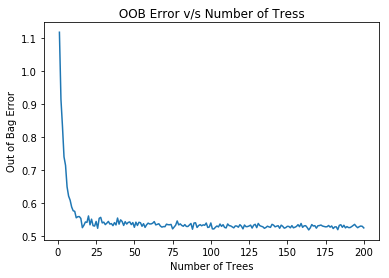

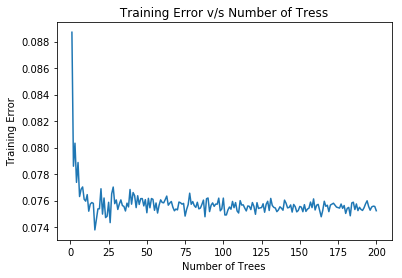

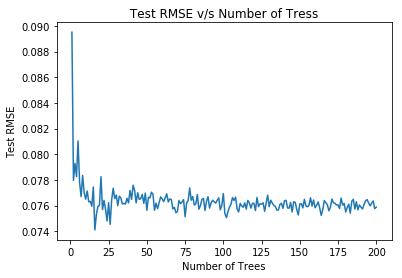

########################################
Maximum number of Features =  2 

----------------------------------------
Number of Trees =  1 

Training RMSE  =  0.07787527639213902 

Testing RMSE  =  0.07777804857029119 

Out of bag error =  1.0620142344102457 

----------------------------------------
Number of Trees =  2 

Training RMSE  =  0.06549433656971537 

Testing RMSE  =  0.06747889623919065 

Out of bag error =  0.8188008978571386 

----------------------------------------
Number of Trees =  3 

Training RMSE  =  0.06938646939201837 

Testing RMSE  =  0.06898478974799328 

Out of bag error =  0.7144993490359794 

----------------------------------------
Number of Trees =  4 

Training RMSE  =  0.06502589604651554 

Testing RMSE  =  0.06459089161633752 

Out of bag error =  0.5921869787364653 

----------------------------------------
Number of Trees =  5 

Training RMSE  =  0.06596784739570352 

Testing RMSE  =  0.06666825453707459 

Out of bag error =  0.5568831167646227 

-----

Training RMSE  =  0.06480813346597074 

Testing RMSE  =  0.0652357630805983 

Out of bag error =  0.3960239799137185 

----------------------------------------
Number of Trees =  46 

Training RMSE  =  0.06535612075416357 

Testing RMSE  =  0.0653222925843598 

Out of bag error =  0.40148484160775516 

----------------------------------------
Number of Trees =  47 

Training RMSE  =  0.06338646609140167 

Testing RMSE  =  0.06399432651282218 

Out of bag error =  0.3778088918511111 

----------------------------------------
Number of Trees =  48 

Training RMSE  =  0.06514593075775146 

Testing RMSE  =  0.06553231985007614 

Out of bag error =  0.39918274045009794 

----------------------------------------
Number of Trees =  49 

Training RMSE  =  0.06416220539851476 

Testing RMSE  =  0.06490082663326684 

Out of bag error =  0.3866798675444842 

----------------------------------------
Number of Trees =  50 

Training RMSE  =  0.0644808236180976 

Testing RMSE  =  0.06529899390824724

Training RMSE  =  0.06423589288322494 

Testing RMSE  =  0.06478375536018532 

Out of bag error =  0.3853236024126587 

----------------------------------------
Number of Trees =  91 

Training RMSE  =  0.0646279740459734 

Testing RMSE  =  0.06507436668995187 

Out of bag error =  0.3900431040239898 

----------------------------------------
Number of Trees =  92 

Training RMSE  =  0.0641454623059642 

Testing RMSE  =  0.06457841239896829 

Out of bag error =  0.3842897732293927 

----------------------------------------
Number of Trees =  93 

Training RMSE  =  0.0643850971267066 

Testing RMSE  =  0.06478434367112718 

Out of bag error =  0.3876482828234906 

----------------------------------------
Number of Trees =  94 

Training RMSE  =  0.06419666023698854 

Testing RMSE  =  0.06454873234787399 

Out of bag error =  0.38498336328259647 

----------------------------------------
Number of Trees =  95 

Training RMSE  =  0.06440286930078849 

Testing RMSE  =  0.06475660439304558 

Training RMSE  =  0.06452096636065376 

Testing RMSE  =  0.06499446118563118 

Out of bag error =  0.3883887088594166 

----------------------------------------
Number of Trees =  136 

Training RMSE  =  0.06381151102923273 

Testing RMSE  =  0.06440681488167323 

Out of bag error =  0.37968497204996265 

----------------------------------------
Number of Trees =  137 

Training RMSE  =  0.0640954526253074 

Testing RMSE  =  0.06460528567538311 

Out of bag error =  0.3830290793257145 

----------------------------------------
Number of Trees =  138 

Training RMSE  =  0.06461255025237836 

Testing RMSE  =  0.06487567372190155 

Out of bag error =  0.38909050348424684 

----------------------------------------
Number of Trees =  139 

Training RMSE  =  0.06480510587278 

Testing RMSE  =  0.06520235670237874 

Out of bag error =  0.39166351720975917 

----------------------------------------
Number of Trees =  140 

Training RMSE  =  0.06439428214159952 

Testing RMSE  =  0.064839068100

Training RMSE  =  0.06445083642894456 

Testing RMSE  =  0.06497872155018002 

Out of bag error =  0.3861048351629476 

----------------------------------------
Number of Trees =  181 

Training RMSE  =  0.0646134646148812 

Testing RMSE  =  0.06499607726345034 

Out of bag error =  0.38865235533466336 

----------------------------------------
Number of Trees =  182 

Training RMSE  =  0.06406930751681567 

Testing RMSE  =  0.06445750490655362 

Out of bag error =  0.3823534446655136 

----------------------------------------
Number of Trees =  183 

Training RMSE  =  0.064088480586408 

Testing RMSE  =  0.06440508828347516 

Out of bag error =  0.38281742037410404 

----------------------------------------
Number of Trees =  184 

Training RMSE  =  0.064315965261174 

Testing RMSE  =  0.06483930588550459 

Out of bag error =  0.3857067854440368 

----------------------------------------
Number of Trees =  185 

Training RMSE  =  0.06427353351695735 

Testing RMSE  =  0.06454374531216

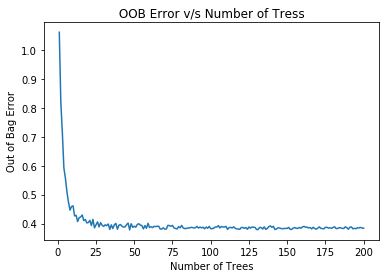

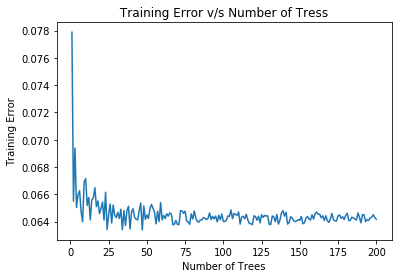

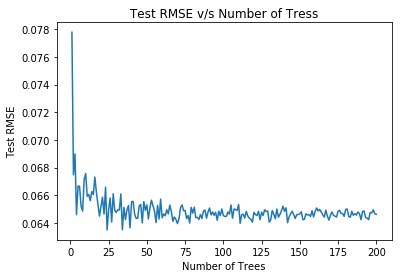

########################################
Maximum number of Features =  3 

----------------------------------------
Number of Trees =  1 

Training RMSE  =  0.06991908240289266 

Testing RMSE  =  0.07124461261273969 

Out of bag error =  1.0162159231340486 

----------------------------------------
Number of Trees =  2 

Training RMSE  =  0.06694472895644057 

Testing RMSE  =  0.06779201349709904 

Out of bag error =  0.8129154286830993 

----------------------------------------
Number of Trees =  3 

Training RMSE  =  0.06451637418913726 

Testing RMSE  =  0.0656265919707368 

Out of bag error =  0.6634708213286373 

----------------------------------------
Number of Trees =  4 

Training RMSE  =  0.06040183049672908 

Testing RMSE  =  0.06160068208038322 

Out of bag error =  0.5263411749233271 

----------------------------------------
Number of Trees =  5 

Training RMSE  =  0.06100252457077475 

Testing RMSE  =  0.06032638891433234 

Out of bag error =  0.47747357248049915 

-----

Training RMSE  =  0.06036630453821991 

Testing RMSE  =  0.060479095057792 

Out of bag error =  0.3412110256846984 

----------------------------------------
Number of Trees =  46 

Training RMSE  =  0.059788497296642096 

Testing RMSE  =  0.06012752942509933 

Out of bag error =  0.33595875999731717 

----------------------------------------
Number of Trees =  47 

Training RMSE  =  0.06021482934206543 

Testing RMSE  =  0.060354012270592484 

Out of bag error =  0.3391636447208195 

----------------------------------------
Number of Trees =  48 

Training RMSE  =  0.06003055899494901 

Testing RMSE  =  0.06011013356426712 

Out of bag error =  0.3369876894528995 

----------------------------------------
Number of Trees =  49 

Training RMSE  =  0.06021684024189557 

Testing RMSE  =  0.0601716146572144 

Out of bag error =  0.3393212732141945 

----------------------------------------
Number of Trees =  50 

Training RMSE  =  0.06011028831875267 

Testing RMSE  =  0.0605446995786098

Training RMSE  =  0.060107157812587735 

Testing RMSE  =  0.060294518505862274 

Out of bag error =  0.3359480018853769 

----------------------------------------
Number of Trees =  91 

Training RMSE  =  0.060224667516351915 

Testing RMSE  =  0.06045367882004522 

Out of bag error =  0.3379910749643411 

----------------------------------------
Number of Trees =  92 

Training RMSE  =  0.060601582556642955 

Testing RMSE  =  0.06063042705082393 

Out of bag error =  0.34274776254912603 

----------------------------------------
Number of Trees =  93 

Training RMSE  =  0.06034123303230014 

Testing RMSE  =  0.06066927073774843 

Out of bag error =  0.3391454655293284 

----------------------------------------
Number of Trees =  94 

Training RMSE  =  0.06062806039034865 

Testing RMSE  =  0.06093223207755129 

Out of bag error =  0.34297830611282476 

----------------------------------------
Number of Trees =  95 

Training RMSE  =  0.0604040693994554 

Testing RMSE  =  0.06064778691

Training RMSE  =  0.060146356648581124 

Testing RMSE  =  0.06028520221365695 

Out of bag error =  0.3372321032282947 

----------------------------------------
Number of Trees =  135 

Training RMSE  =  0.06054738525995525 

Testing RMSE  =  0.06061354659165788 

Out of bag error =  0.34074477415951787 

----------------------------------------
Number of Trees =  136 

Training RMSE  =  0.06026791794390629 

Testing RMSE  =  0.06037335674992109 

Out of bag error =  0.3383615746171347 

----------------------------------------
Number of Trees =  137 

Training RMSE  =  0.06059461724098583 

Testing RMSE  =  0.06076018828142476 

Out of bag error =  0.341168186522505 

----------------------------------------
Number of Trees =  138 

Training RMSE  =  0.06002688756329214 

Testing RMSE  =  0.06026612234108379 

Out of bag error =  0.33522120775148007 

----------------------------------------
Number of Trees =  139 

Training RMSE  =  0.06050291958327814 

Testing RMSE  =  0.060629925

Training RMSE  =  0.06042938794596039 

Testing RMSE  =  0.06063587530815715 

Out of bag error =  0.3391860355352168 

----------------------------------------
Number of Trees =  179 

Training RMSE  =  0.060216745270186195 

Testing RMSE  =  0.060352183315922736 

Out of bag error =  0.33707029240920994 

----------------------------------------
Number of Trees =  180 

Training RMSE  =  0.06033433766678813 

Testing RMSE  =  0.06047866810907917 

Out of bag error =  0.338417976649174 

----------------------------------------
Number of Trees =  181 

Training RMSE  =  0.06047233723716488 

Testing RMSE  =  0.06058320956624305 

Out of bag error =  0.33959027636701206 

----------------------------------------
Number of Trees =  182 

Training RMSE  =  0.060099169342302326 

Testing RMSE  =  0.06027759834624964 

Out of bag error =  0.33602262151781437 

----------------------------------------
Number of Trees =  183 

Training RMSE  =  0.06031201254334959 

Testing RMSE  =  0.060490

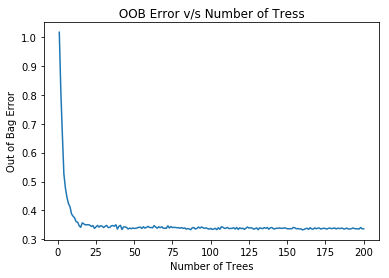

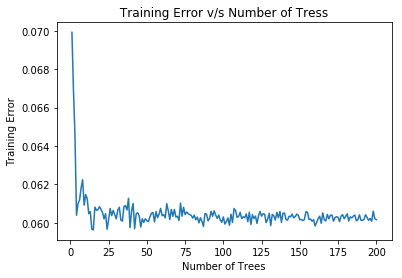

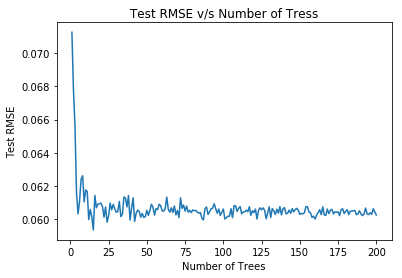

########################################
Maximum number of Features =  4 

----------------------------------------
Number of Trees =  1 

Training RMSE  =  0.06407778162995688 

Testing RMSE  =  0.06404716806838091 

Out of bag error =  0.9845355985375239 

----------------------------------------
Number of Trees =  2 

Training RMSE  =  0.062173695500449995 

Testing RMSE  =  0.06259619844305614 

Out of bag error =  0.7465110269460834 

----------------------------------------
Number of Trees =  3 

Training RMSE  =  0.061360187132930316 

Testing RMSE  =  0.061494324319841476 

Out of bag error =  0.6166352030989962 

----------------------------------------
Number of Trees =  4 

Training RMSE  =  0.06136661332069583 

Testing RMSE  =  0.06120724717577745 

Out of bag error =  0.5249763825225682 

----------------------------------------
Number of Trees =  5 

Training RMSE  =  0.06163968219036472 

Testing RMSE  =  0.06156201996908416 

Out of bag error =  0.46346035232256283 

-

Training RMSE  =  0.06090246045997832 

Testing RMSE  =  0.06100786712998227 

Out of bag error =  0.34478736720733194 

----------------------------------------
Number of Trees =  46 

Training RMSE  =  0.06059859796777795 

Testing RMSE  =  0.060755316514876485 

Out of bag error =  0.3416092818898193 

----------------------------------------
Number of Trees =  47 

Training RMSE  =  0.0609092878302199 

Testing RMSE  =  0.06105652902947642 

Out of bag error =  0.34493864423569054 

----------------------------------------
Number of Trees =  48 

Training RMSE  =  0.06077663911723655 

Testing RMSE  =  0.06094446941600277 

Out of bag error =  0.34312960026801886 

----------------------------------------
Number of Trees =  49 

Training RMSE  =  0.06070905414030684 

Testing RMSE  =  0.06085451732314934 

Out of bag error =  0.34242829209349235 

----------------------------------------
Number of Trees =  50 

Training RMSE  =  0.06067274449503139 

Testing RMSE  =  0.060846099006

Training RMSE  =  0.06075263783153799 

Testing RMSE  =  0.060921333367242377 

Out of bag error =  0.3421801812968307 

----------------------------------------
Number of Trees =  91 

Training RMSE  =  0.06068181482738644 

Testing RMSE  =  0.06086833987119701 

Out of bag error =  0.34200148900354954 

----------------------------------------
Number of Trees =  92 

Training RMSE  =  0.06087749360851342 

Testing RMSE  =  0.060982249589551375 

Out of bag error =  0.3433962620998138 

----------------------------------------
Number of Trees =  93 

Training RMSE  =  0.06078376335255948 

Testing RMSE  =  0.060909823319261064 

Out of bag error =  0.3431304903023851 

----------------------------------------
Number of Trees =  94 

Training RMSE  =  0.060842456535665265 

Testing RMSE  =  0.06098349828812787 

Out of bag error =  0.3431489188383698 

----------------------------------------
Number of Trees =  95 

Training RMSE  =  0.06062208536659587 

Testing RMSE  =  0.06079249484

Training RMSE  =  0.06061250109184209 

Testing RMSE  =  0.060764840051091014 

Out of bag error =  0.34074606717063544 

----------------------------------------
Number of Trees =  135 

Training RMSE  =  0.060607234004787965 

Testing RMSE  =  0.06077077791140976 

Out of bag error =  0.34077959990048046 

----------------------------------------
Number of Trees =  136 

Training RMSE  =  0.060780404935651615 

Testing RMSE  =  0.06088745257120648 

Out of bag error =  0.3427749915981372 

----------------------------------------
Number of Trees =  137 

Training RMSE  =  0.06066128999128559 

Testing RMSE  =  0.06080010261342729 

Out of bag error =  0.34137271608087805 

----------------------------------------
Number of Trees =  138 

Training RMSE  =  0.060697884562274686 

Testing RMSE  =  0.06083530285975676 

Out of bag error =  0.34151831155634127 

----------------------------------------
Number of Trees =  139 

Training RMSE  =  0.06075200680217855 

Testing RMSE  =  0.060

Training RMSE  =  0.06073459825313685 

Testing RMSE  =  0.0608449907667483 

Out of bag error =  0.34162743896512576 

----------------------------------------
Number of Trees =  179 

Training RMSE  =  0.06077444836351287 

Testing RMSE  =  0.06092521350653396 

Out of bag error =  0.3422834010320894 

----------------------------------------
Number of Trees =  180 

Training RMSE  =  0.06079649353032311 

Testing RMSE  =  0.0609213530913697 

Out of bag error =  0.3425585878048347 

----------------------------------------
Number of Trees =  181 

Training RMSE  =  0.060582454697159255 

Testing RMSE  =  0.060766313083569744 

Out of bag error =  0.3406123777429543 

----------------------------------------
Number of Trees =  182 

Training RMSE  =  0.060730035348234596 

Testing RMSE  =  0.06088346890561217 

Out of bag error =  0.34191069460752443 

----------------------------------------
Number of Trees =  183 

Training RMSE  =  0.06066216317217127 

Testing RMSE  =  0.06080049

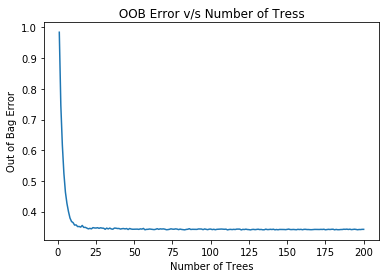

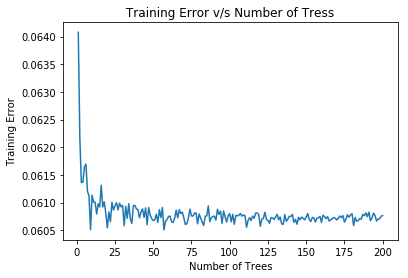

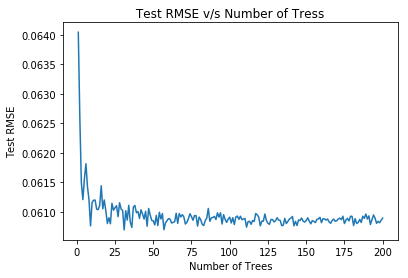

########################################
Maximum number of Features =  5 

----------------------------------------
Number of Trees =  1 

Training RMSE  =  0.06099041038907014 

Testing RMSE  =  0.06099408832532859 

Out of bag error =  0.974431437878643 

----------------------------------------
Number of Trees =  2 

Training RMSE  =  0.0610096786970255 

Testing RMSE  =  0.06104250953677441 

Out of bag error =  0.7473459734858792 

----------------------------------------
Number of Trees =  3 

Training RMSE  =  0.06094784133406651 

Testing RMSE  =  0.06097306274202473 

Out of bag error =  0.5966015043780881 

----------------------------------------
Number of Trees =  4 

Training RMSE  =  0.060374180596093396 

Testing RMSE  =  0.060636500230155495 

Out of bag error =  0.5049249837765245 

----------------------------------------
Number of Trees =  5 

Training RMSE  =  0.060890903133141605 

Testing RMSE  =  0.06091206707411883 

Out of bag error =  0.44782880359107063 

---

Training RMSE  =  0.06038142320246619 

Testing RMSE  =  0.060535143149297595 

Out of bag error =  0.33796390529481807 

----------------------------------------
Number of Trees =  46 

Training RMSE  =  0.06034637767465547 

Testing RMSE  =  0.06047742413790553 

Out of bag error =  0.33744491373319596 

----------------------------------------
Number of Trees =  47 

Training RMSE  =  0.06027861091924819 

Testing RMSE  =  0.060419340090572156 

Out of bag error =  0.3367902998611482 

----------------------------------------
Number of Trees =  48 

Training RMSE  =  0.06032201796100243 

Testing RMSE  =  0.060487066266307905 

Out of bag error =  0.33710239030034894 

----------------------------------------
Number of Trees =  49 

Training RMSE  =  0.06016737027917169 

Testing RMSE  =  0.06039180570935974 

Out of bag error =  0.3360616537771039 

----------------------------------------
Number of Trees =  50 

Training RMSE  =  0.06028491907143964 

Testing RMSE  =  0.0604830877

Training RMSE  =  0.06024289711339296 

Testing RMSE  =  0.06038889058667702 

Out of bag error =  0.3360454166405093 

----------------------------------------
Number of Trees =  91 

Training RMSE  =  0.06037488219958178 

Testing RMSE  =  0.06052664625174105 

Out of bag error =  0.33764239583868755 

----------------------------------------
Number of Trees =  92 

Training RMSE  =  0.060388968699269276 

Testing RMSE  =  0.060554494395484625 

Out of bag error =  0.33783704016907035 

----------------------------------------
Number of Trees =  93 

Training RMSE  =  0.060440942253105756 

Testing RMSE  =  0.06056223911063713 

Out of bag error =  0.33807140404099145 

----------------------------------------
Number of Trees =  94 

Training RMSE  =  0.060377468280146035 

Testing RMSE  =  0.06052688834096549 

Out of bag error =  0.3377364237126 

----------------------------------------
Number of Trees =  95 

Training RMSE  =  0.06035410614323818 

Testing RMSE  =  0.060501798015

Training RMSE  =  0.06031080660915111 

Testing RMSE  =  0.060472914286694976 

Out of bag error =  0.33675890369980827 

----------------------------------------
Number of Trees =  135 

Training RMSE  =  0.06039896191015787 

Testing RMSE  =  0.06056170460623442 

Out of bag error =  0.33769370013881084 

----------------------------------------
Number of Trees =  136 

Training RMSE  =  0.06033517311558873 

Testing RMSE  =  0.06050891067511214 

Out of bag error =  0.3371730114300652 

----------------------------------------
Number of Trees =  137 

Training RMSE  =  0.06041329222585805 

Testing RMSE  =  0.06053953232938289 

Out of bag error =  0.3378305782557224 

----------------------------------------
Number of Trees =  138 

Training RMSE  =  0.06029299714794955 

Testing RMSE  =  0.060469348117759246 

Out of bag error =  0.33687983955462786 

----------------------------------------
Number of Trees =  139 

Training RMSE  =  0.06029109401201292 

Testing RMSE  =  0.060433

Training RMSE  =  0.060347959966563926 

Testing RMSE  =  0.06049927863603194 

Out of bag error =  0.3372049364237614 

----------------------------------------
Number of Trees =  179 

Training RMSE  =  0.060388165284811154 

Testing RMSE  =  0.06055209046763355 

Out of bag error =  0.337431553274392 

----------------------------------------
Number of Trees =  180 

Training RMSE  =  0.06035787328730605 

Testing RMSE  =  0.06051728881295304 

Out of bag error =  0.33714511968277694 

----------------------------------------
Number of Trees =  181 

Training RMSE  =  0.06032931130983496 

Testing RMSE  =  0.06049810762567055 

Out of bag error =  0.3370372600082946 

----------------------------------------
Number of Trees =  182 

Training RMSE  =  0.06033817046544651 

Testing RMSE  =  0.06049122361430532 

Out of bag error =  0.3368998801215012 

----------------------------------------
Number of Trees =  183 

Training RMSE  =  0.06030695903976165 

Testing RMSE  =  0.060482014

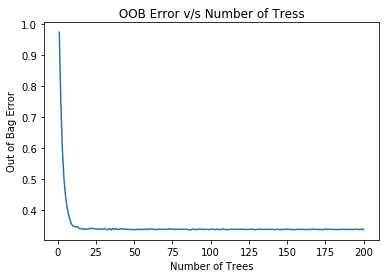

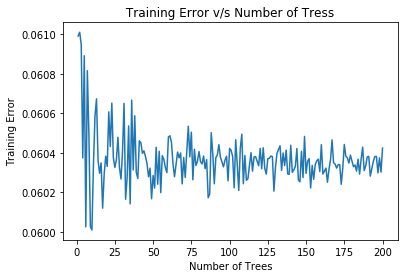

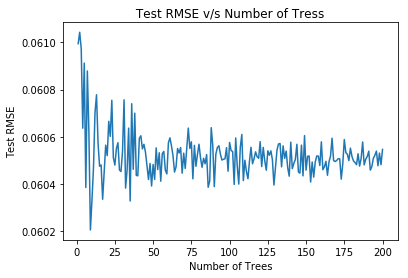

In [34]:
treeArray = np.arange(1,201)
featuresArray = np.arange(1,6)



for featureNum in featuresArray:
    oobAvgErrorArray = []
    testRMSEArray = []
    trainRMSEArray = []
    print ("#"*40)
    print ("Maximum number of Features = ", featureNum, "\n")
    for treenum in treeArray:
    
        
        
        random_forest = RandomForestRegressor(n_estimators=treenum, max_features=featureNum, 
                                      max_depth = treeDepth,bootstrap = True, oob_score=True)
        print("-"*40)
        print ("Number of Trees = " , treenum, "\n")
        k_fold = KFold(n_splits=10)
        testMSE = []
        trainMSE = []
        oob_error_fold = []
        



        for train, test in k_fold.split(X, y):

            random_forest.fit(X[train], y[train])
            yTest_predict = random_forest.predict(X[test])
            yTrain_predict = random_forest.predict(X[train])
            trainMSE.append(metrics.mean_squared_error(y[train], yTrain_predict))
            testMSE.append(metrics.mean_squared_error(y[test], yTest_predict))
            oob_error = 1 - random_forest.oob_score_
            oob_error_fold.append(oob_error)

        
        trainRMSE = np.sqrt(np.mean(trainMSE))
        testRMSE = np.sqrt(np.mean(testMSE))
        oobErrorAvg = np.mean(oob_error_fold)
        print ("Training RMSE  = ", trainRMSE, "\n")
        print ("Testing RMSE  = ", testRMSE, "\n")
        print ("Out of bag error = ", oobErrorAvg, "\n")
        
        
        trainRMSEArray.append(np.sqrt(np.mean(trainMSE)))
        testRMSEArray.append(np.sqrt(np.mean(testMSE)))
        oobAvgErrorArray.append(np.mean(oob_error_fold))
    
    plt.figure()
    plt.plot(treeArray,oobAvgErrorArray)
    plt.title(" OOB Error v/s Number of Tress ")
    plt.xlabel("Number of Trees")
    plt.ylabel("Out of Bag Error", rotation=90)
    plt.show()
    
    plt.figure()
    plt.plot(treeArray,trainRMSEArray)
    plt.title(" Training Error v/s Number of Tress ")
    plt.xlabel("Number of Trees")
    plt.ylabel("Training Error", rotation=90)
    plt.show()
    
    plt.figure()
    plt.plot(treeArray,testRMSEArray)
    plt.title(" Test RMSE v/s Number of Tress ")
    plt.xlabel("Number of Trees")
    plt.ylabel("Test RMSE", rotation=90)
    plt.show()
    


In [40]:
#Best number of tress
treeArray(np.argsort(oobAvgErrorArray)[0])

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
# Number of trees for best Test RMSE and OOB score = 25
# Num of features for best Test RMSE and OOB score = 5

----------------------------------------
Maximum Depth of tree =  1 

Training RMSE  =  0.09746722144489835 

Testing RMSE  =  0.09754089918224022 

Out of bag error =  0.8752855894795312 

----------------------------------------
Maximum Depth of tree =  2 

Training RMSE  =  0.0863074441932539 

Testing RMSE  =  0.08640019635471763 

Out of bag error =  0.6872984936130015 

----------------------------------------
Maximum Depth of tree =  3 

Training RMSE  =  0.07934998905298934 

Testing RMSE  =  0.07954097724590231 

Out of bag error =  0.5821110887176416 

----------------------------------------
Maximum Depth of tree =  4 

Training RMSE  =  0.06045523640073359 

Testing RMSE  =  0.06058771296692911 

Out of bag error =  0.3383941157458156 

----------------------------------------
Maximum Depth of tree =  5 

Training RMSE  =  0.042275113697576076 

Testing RMSE  =  0.04228880340012558 

Out of bag error =  0.1660772921319925 

----------------------------------------
Maximum D

Training RMSE  =  0.0052072692576749504 

Testing RMSE  =  0.01471868955245396 

Out of bag error =  0.018230460732954968 

----------------------------------------
Maximum Depth of tree =  44 

Training RMSE  =  0.005217035795474594 

Testing RMSE  =  0.014730208251269512 

Out of bag error =  0.01825306434652716 

----------------------------------------
Maximum Depth of tree =  45 

Training RMSE  =  0.005218400498917094 

Testing RMSE  =  0.014721975873613652 

Out of bag error =  0.018237693749512462 

----------------------------------------
Maximum Depth of tree =  46 

Training RMSE  =  0.005218209351110385 

Testing RMSE  =  0.01473226122409061 

Out of bag error =  0.01820387145065928 

----------------------------------------
Maximum Depth of tree =  47 

Training RMSE  =  0.005210925792445317 

Testing RMSE  =  0.014718318966358937 

Out of bag error =  0.018294308373784107 

----------------------------------------
Maximum Depth of tree =  48 

Training RMSE  =  0.00520241

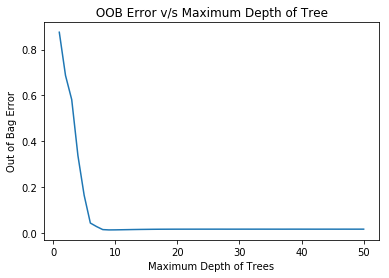

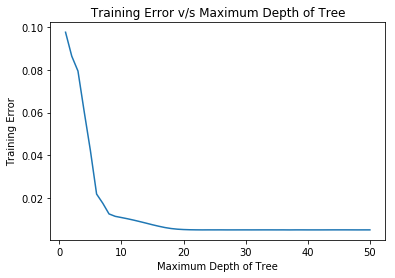

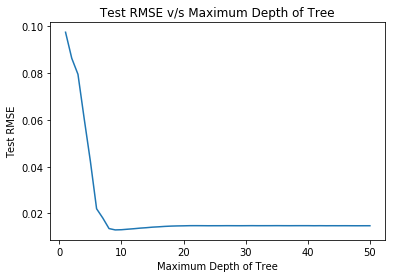

In [39]:
# Let us now sweep over Max depth of trees. 
depthArray = np.arange(1,51)

trainRMSEArray = []
testRMSEArray = []
oobAvgErrorArray = []

for k in depthArray:
    
    random_forest = RandomForestRegressor(n_estimators=25, max_features=5, 
                                  max_depth = k,bootstrap = True, oob_score=True)
    print("-"*40)
    print ("Maximum Depth of tree = " , k, "\n")
    k_fold = KFold(n_splits=10)
    testMSE = []
    trainMSE = []
    oob_error_fold = []

    for train, test in k_fold.split(X, y):

        random_forest.fit(X[train], y[train])
        yTest_predict = random_forest.predict(X[test])
        yTrain_predict = random_forest.predict(X[train])
        trainMSE.append(metrics.mean_squared_error(y[train], yTrain_predict))
        testMSE.append(metrics.mean_squared_error(y[test], yTest_predict))
        oob_error = 1 - random_forest.oob_score_
        oob_error_fold.append(oob_error)


    trainRMSE = np.sqrt(np.mean(trainMSE))
    testRMSE = np.sqrt(np.mean(testMSE))
    oobErrorAvg = np.mean(oob_error_fold)
    print ("Training RMSE  = ", trainRMSE, "\n")
    print ("Testing RMSE  = ", testRMSE, "\n")
    print ("Out of bag error = ", oobErrorAvg, "\n")


    trainRMSEArray.append(trainRMSE)
    testRMSEArray.append(testRMSE)
    oobAvgErrorArray.append(oobErrorAvg)

#plotting 

plt.figure()
plt.plot(depthArray,oobAvgErrorArray)
plt.title(" OOB Error v/s Maximum Depth of Tree ")
plt.xlabel("Maximum Depth of Trees")
plt.ylabel("Out of Bag Error", rotation=90)
plt.show()

plt.figure()
plt.plot(depthArray,trainRMSEArray)
plt.title(" Training Error v/s Maximum Depth of Tree ")
plt.xlabel("Maximum Depth of Tree")
plt.ylabel("Training Error", rotation=90)
plt.show()

plt.figure()
plt.plot(depthArray,testRMSEArray)
plt.title(" Test RMSE v/s Maximum Depth of Tree ")
plt.xlabel("Maximum Depth of Tree")
plt.ylabel("Test RMSE", rotation=90)
plt.show()




In [41]:
# Number of trees for best Test RMSE and OOB score = 25
# Num of features for best Test RMSE and OOB score = 5
# Maximum Tree depth is 9. 
#best Model fitting

random_forest = RandomForestRegressor(n_estimators=25, max_features=5, 
                                  max_depth = 9,bootstrap = True, oob_score=True)

#K-fold cross Validation:
k_fold = KFold(n_splits=10)
testMSE = []
trainMSE = []

for train, test in k_fold.split(X, y):
    
    random_forest.fit(X[train], y[train])
    yTest_predict = random_forest.predict(X[test])
    yTrain_predict = random_forest.predict(X[train])
    
    trainMSE.append(metrics.mean_squared_error(y[train], yTrain_predict))
    testMSE.append(metrics.mean_squared_error(y[test], yTest_predict))


trainRMSE = np.sqrt(np.mean(trainMSE))
testRMSE = np.sqrt(np.mean(testMSE))

print ("Training RMSE with Kfold cross Validation = ", trainRMSE, "\n")
print ("Testing RMSE with Kfold cross Validation = ", testRMSE, "\n")

Training RMSE with Kfold cross Validation =  0.011562510900775941 

Testing RMSE with Kfold cross Validation =  0.012923415984339236 



In [44]:
# 10 fold cross validation using cross_val
predicted = cross_val_predict(random_forest, X, y, cv=10)
print ("RMSE with cross validation (computed by cross_val_predict):", np.sqrt(metrics.mean_squared_error(y, predicted)))
print ("\n")

RMSE with cross validation (computed by cross_val_predict): 0.012950641944742788




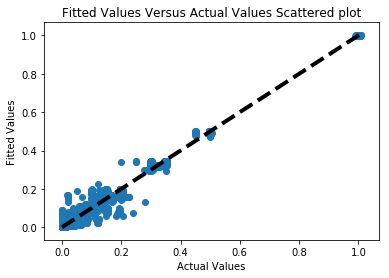

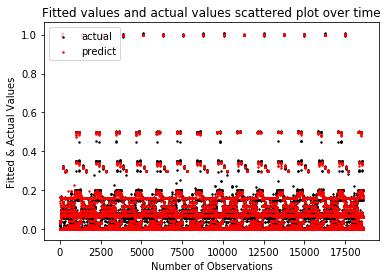

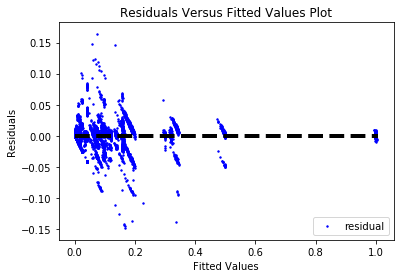

In [45]:
# plot fitted values vs actual values scattered plot
plt.figure()
plt.title('Fitted Values Versus Actual Values Scattered plot')
plt.scatter(y, predicted)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
if savePlots:
    plt.savefig('fittedVsActual2aiii.png')
plt.show()


# Plot Fitted values and actual values scattered plot over time
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(y.shape[0]), y, color='black', label='actual', s=2)
plt.scatter(np.arange(y.shape[0]), predicted, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
if savePlots:
    plt.savefig('fittedVsActualOverTime2aiii.png')
plt.show()

# plot residuals versus fitted values plot
plt.title('Residuals Versus Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(predicted,y-predicted,  color='blue', lw=1, label='residual', s=2)
plt.plot([y.min(), y.max()], [0, 0], 'k--', lw=4)
plt.legend(loc='lower right')
if savePlots:
    plt.savefig('residualsVsFitted2aiii.png')
plt.show()


In [48]:
importantFeatures = random_forest.feature_importances_
print("Feature Importnace : ", importantFeatures, "\n")

Feature Importnace :  [0.00172347 0.19684313 0.398497   0.14349057 0.25944584] 



### Tree Visualization: 

In [71]:
random_forest = RandomForestRegressor(n_estimators=25, max_features=5, 
                                  max_depth = 4,bootstrap = True, oob_score=True)
k_fold = KFold(n_splits=10)
testMSE = []
trainMSE = []

for train, test in k_fold.split(X, y):
    
    random_forest.fit(X[train], y[train])
    yTest_predict = random_forest.predict(X[test])
    yTrain_predict = random_forest.predict(X[train])
    
    trainMSE.append(metrics.mean_squared_error(y[train], yTrain_predict))
    testMSE.append(metrics.mean_squared_error(y[test], yTest_predict))


trainRMSE = np.sqrt(np.mean(trainMSE))
testRMSE = np.sqrt(np.mean(testMSE))

print ("Training RMSE with Kfold cross Validation = ", trainRMSE, "\n")
print ("Testing RMSE with Kfold cross Validation = ", testRMSE, "\n")

importantFeatures = random_forest.feature_importances_
print("Feature Importnace : ", importantFeatures, "\n")



Training RMSE with Kfold cross Validation =  0.060228816978582386 

Testing RMSE with Kfold cross Validation =  0.060460524106172454 

Feature Importnace :  [3.25896734e-06 2.77616680e-01 1.55101616e-01 1.61547576e-01
 4.05730869e-01] 



In [80]:
Xpanda = df2[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']]
ypanda = df2['Size of Backup (GB)']

random_forest = RandomForestRegressor(n_estimators=25, max_features=5, 
                                  max_depth = 4,bootstrap = True, oob_score=True)

random_forest.fit(X, y)

for i in range(1,25):
    export_graphviz(random_forest.estimators_[i-1],
                feature_names=Xpanda.columns,
                filled=True,
                rounded=True)
    os.system('dot -Tpng tree.dot -o'+str(i)+'_tree.png')